In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt
import scipy.stats as stats

## Objectives
-   What is the most important factor in determining survival of the Titanic incident?

-   In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?

-   “Women and children first”. Was this the case?

-   Add one other observation that you have noted in the dataset.



In [ ]:
#Using read_csv() to read 'Titanic.csv' 
df_titanic = pd.read_csv('Titanic.csv')

#Checking if there is null values in the columns and it's type
df_titanic.info()

#Storing the amount of null values that are found in each columns
null_count = df_titanic.isnull().sum()

#Fitlering null_count vairable to only show the what columns are null
null_count = null_count[null_count > 0]
print(f"\nMissing data found in the columns (Other columns have no null values)\n{null_count}")

#Shows the first 10 of the dataframe
df_titanic.head(10)

Dropping the column 'Name','Ticket','Cabin' as you can't use any data analytic technique that is relevant to the obejectives that is listed. Also the 'Name','Ticket','Cabin' column doens't relevance to the other columns as there no direct effect on objectives.

In [ ]:
#Dropping the column 'Name', 'Ticket' and 'Cabin'
df_titanic.drop('Name', axis=1, inplace=True)
df_titanic.drop('Ticket', axis=1, inplace=True)
df_titanic.drop('Cabin', axis=1, inplace=True)
#Showing updated dataframe with the droped column
df_titanic.head()


## Understanding the data

### What type of varibles are found in the columns?

The table below shows all the column that is found in the data frame. Each of the column explains what type the variable is and a brief explanation of what each of those variables mean. 

| Varible Name  | Variable Type         | Description |
| -----------   | --------------------- | ----------- |
| PassengerID   | Index                 | Unique identifier for each of the passenger in the data frame       |
| Survived      | Categorical binary    | 'Survived' relates to whether that passenger had survived the event (e.g value=1 is Yes, value=0 is No)        |
| Pclass        | Ordinal categorical   | 'Passenger Class' are values that relate to the level of service that the passenger recieve (e.g  hierarchy (1st > 2nd > 3rd) in passenger classes on the Titanic) |
| Sex           | Categorical           | 'Sex' relates whether the passenger is a 'male' or a 'female'  |
| Age           | Categorical           | 'Age' relates how old was the passenger during the event   |
| SibSp         | Discreate numerical   | (SibSp = siblings or spouses). The amount of siblings or spouses during the event |
| Parch         | Discreate numerical   | (Parch = parents or children). The amount of parents or children during the event |
| Fare          | Continuous            | 'Fare' is the amount paid for their ticket/s |
| Embarked      | Categorical           | 'Embarked' shows which section of the titanic the passenger was located |

## How I will be displaying each of the variables?

The table belows show the avaible options that will allow me to visually understand the data and to see any anomalies can be found
| Variable Type |  Graphical representation |
| ----------- | ----------- |
| Categorical | Pie Chart, Bar Chart |
| Continuous, Discreate | Histogram, Box Plot, Heatmap |



In [ ]:
#Checking the unqiue categoiral values that is found in the categoiral values and sorting the value 
print(f"\nUnique values for categorical variable\n")
print(f"Survived: \t{df_titanic['Survived'].unique()}")
print(f"Sex: \t\t{df_titanic['Sex'].unique()}")
print(f"Pclass: \t{sorted(df_titanic['Pclass'].unique())}")
print(f"Embarked: \t{df_titanic['Embarked'].unique()}")

### Explaining unique values for each categorical variable in a dataset

The code above is used to find the unqiue values/names that is used in the dataset for categorial varibles

**Survivied**
- Value '0' means causality/death
- Value '1' means survived/alive

**Sex**
- Value 'male' means the passengar was a male 
- Value 'female' means the passengar was a female 

**Pclass (Passenger class)**
- Value '1' means 1st class ticket 
- Value '2' means 2nd class ticket 
- Value '3' means 3rd class ticket 

**Embarked**
- Value 'S' means Southampton
- Value 'Q' means Queenstown
- Value 'C' means Cherbourg



In [ ]:
#Checking the options that is in the 'Survived' column
print(f"Options in the 'Survived' columns {df_titanic['Survived'].unique()}")

#counts the amount of passengers that didn't survived by setting the value 'Survived' == 0
non_survived_count = df_titanic[df_titanic['Survived'] == 0]['Survived'].count()

#counts the amount of passengers that did survived by setting the value 'Survived' == 1
survived_count = df_titanic[df_titanic['Survived'] == 1]['Survived'].count()

#counts the total amount of passenger in the dataframe
total_passengers = df_titanic['PassengerId'].count()

#count the amout of male passenger in the dataframe
total_male = df_titanic[df_titanic['Sex'] == 'male']['Sex'].count()

#count the amount of female passenger in the dataframe
total_female = df_titanic[df_titanic['Sex'] == 'female']['Sex'].count()


#calculating the rate of survival(0.38) and the rate of non survival rate(0.61) 
survival_rate = survived_count / total_passengers
non_survival_rate = non_survived_count / total_passengers

survival_data = {
    'Survived':survived_count,
    'Death':non_survived_count
}

#Figure for pie chart based on the survival percentage of the event
fig_survived = px.pie(df_titanic, values=survival_data.values(), names=survival_data.keys())
#Shows the fig_survived
fig_survived.show()


#Printing out the percentage of both non survival/survival
print(f"The survival percentage: {survival_rate*100:.2f}%\nThe non survival percentage: {non_survival_rate*100:.2f}%")
print(f"The number of people survived is {survival_rate * total_passengers} and {non_survival_rate * total_passengers} passed away")




In [ ]:
#Calculating the distrubition's skewness for 'fig_age' histogram
skewness_age = stats.skew(df_titanic['Age'].dropna())


#Calculating the mean,mode,median for age found in the dataframe
mean_age = df_titanic['Age'].mean()
mode_age = df_titanic['Age'].mode().tolist() 
median_age = df_titanic['Age'].median()


#Printing out the mean, mode, median and skewness of the histogram
print(f"Mean: {mean_age:.2f}\nMode: {mode_age}\nMedian: {median_age}\nSkewness: {skewness_age:.2f}")

#Ploting the histogram for the 'Age' column in the dataframe
fig_age_hist = px.histogram(
    df_titanic, #selecting dataframe 'df_titanic'
    x="Age"     #selecting column 'Age'
)


#Ploting the box plot for the 'Age' column in the dataframe
fig_age_box = px.box(
    df_titanic,
    y='Age'
)

#Adjusting the size of the histogram and boxplot 
fig_age_box.update_layout(height=600, width=800)
fig_age_hist.update_layout(height=600, width=800)

#Showing the histogram for 'Age' column
fig_age_hist.show()
fig_age_box.show()

In [ ]:
# Plot graphic of missing values
missingno.matrix(df_titanic, figsize = (30,10))

# Percentage that is missing from the 'Age' column
age_missing_rate = df_titanic['Age'].isnull().sum()/total_passengers
print(f"In the 'Age' column contains about {age_missing_rate*100:.2f}% missing data (Which is {age_missing_rate*total_passengers} out of {total_passengers})")

# Percentage taht is missing from the 'Embarked' column
embarked_missing_rate = df_titanic['Embarked'].isnull().sum()/total_passengers
print(f"In the 'Embarked' column contains {embarked_missing_rate*100:.2f}% missing data (Which is {embarked_missing_rate*total_passengers} out of {total_passengers})")


After displaying the missing data you can see that most of the missing valeus come from the 'Age' column with a few random ones that can be found in 'Embarked'.  


## Dealing with the missing data that is found in 'Age' and 'Embarked' column

#### Explaing what could have caused the misisng data?

**Age (MNAR)**: There seems to be a sysmetic reason for missingness that is found in the 'Age' column as about 19.87% is missing, the chance of 177 isolated events occuring is unlikely to happen. The matrix above doens't show any visual patterns that can be recognise that would incidate that for that sysmetic reason.  

**Embarked (MCAR)**:  The missing matrix above shows there is no systematic reason for for those 2 (Which is 2.0 out of 891) data point being missing when being compared to other variables. There is no visually patterns that be found for example there is no entire rows that are missing. Since the missing percentaga value is very low which suggest that the likely hood of 2 isolated incident from occuring is probable. 

#### How should I fill in the missing data?

**Age column**

I will be using the median of 28 to fill in the missing data. The reason below is why I choice the median.
-   The distribution is slightly skewed to the right and can be seen in the boxplot & histogram.
-   The majority of the data points are clustered towards the lower end of the scale, with some outliers or high values pulling the distribution towards the right.
-   The skewness value is 0.39 which incidates a mild positve skew distrubtion

**Embarked column**

I will be using the mode of 'S' (Southampton) value as the chances of the 'C' (Cherbourg) is 18.86% and Q (Queenstown) is 8.64%  while 'S' has 72.28% therefore is more likely to occur.
Also since the missing value is only 2 (0.22%) which shouldn't introduce any major significant biases in the analysis. 

In [ ]:
# Replacing the missing value in age with value from 'median_age'
df_titanic.loc[df_titanic['Age'].isnull(), 'Age'] = median_age

# Replacing the missing value in embarked
df_titanic.loc[df_titanic['Embarked'].isnull(), 'Embarked'] = 'S'

## Objectives
-  What is the most important factor in determining survival of the Titanic incident?

Since the objective asks for the 'most important factor,' I will take it as a singular variable and not a combination of factors for the best chance of survival, as it doesn't align with the first objective. Using a heatmap will shows which variable has the most impacted on survival.

In [ ]:
#Convert categorical variable to values as the heatmap in can't take strings
df_titanic['Sex'] = df_titanic['Sex'].map({
    'male':0,
    'female':1
})

df_titanic['Embarked'] = df_titanic['Embarked'].map({
    'S':0,
    'C':1,
    'Q':2
})


# Create a heatmap to visualize correlations with 'Survived'
plt.figure(figsize=(10, 8))
sns.heatmap(df_titanic.corr(), annot=True, cmap='rocket', linewidths=0.5)
plt.title('Correlation Heatmap of Titanic Dataset (with Survived)')
plt.show()


Addressing the first objective by using the heatmap to see which variable has the strongest correlation with the 'Survived' column. Directly looking at the 'Survived' column, it shows that the variable 'Sex' has the strongest correlation of 0.54. The correlation coefficient of 0.54 suggests a moderate positive correlation, meaning that chances of survival from this variable alone will influence your chances of survival.

Another reason why I'm using the heatmap is to remove any unnecessary graphs for each of the vairables when comparing to 'Survived' variable.

In [ ]:
#Convert categorical variable to values back to string for 'Sex' column (e.g 0 to 'male')
df_titanic['Sex'] = df_titanic['Sex'].map({
    0:'male',
    1:'female'
})

#Convert categorical variable to values back to string for 'Embarked' column (e.g 0 to 'S')
df_titanic['Embarked'] = df_titanic['Embarked'].map({
    0:'S',
    1:'C',
    2:'Q'
})

#Creating a new dataframe when the person has survived the titanic event by setting the column 'Survived' == 1
df_survived = df_titanic[df_titanic['Survived'] == 1]

#Showing the tail end of the dataframe of 'df_survived'
df_survived.tail()

In [ ]:
#Creating a new dataframe when the person has deceased in the titanic event by setting the column 'Survived' == 0
df_deceased = df_titanic[df_titanic['Survived'] == 0]

#Showing the tail end of the dataframe of 'df_deceased'
df_deceased.tail()

In [ ]:
#Counting the amount of 'male' that survived in the dataframe of 'df_survived'
amount_survived_m = df_survived[df_survived['Sex'] == 'male']['Sex'].count()

#Counting the amount of 'female' that survived in the dataframe of 'df_survived'
amount_survived_f = df_survived[df_survived['Sex'] == 'female']['Sex'].count()

#Counting the amount of 'male' that has deceased in the dataframe of 'df_deceased'
amount_deceased_m = df_deceased[df_deceased['Sex'] == 'male']['Sex'].count()

#Counting the amount of 'female' that has deceased in the dataframe of 'df_deceased'
amount_deceased_f = df_deceased[df_deceased['Sex'] == 'female']['Sex'].count()

#Printing the amount of people who survived/deceased for male/female
print(f"Male survived: {amount_survived_m}\nMale deceased: {amount_deceased_m}")
print(f"Female survived: {amount_survived_f}\nFemale deceased: {amount_deceased_f}")

#Calculating the rate of survival for male/female using 'df_survived' dataframe
survival_rate_m = amount_survived_m / total_male
survival_rate_f = amount_survived_f / total_female


#Calculating the rate of deceased for male/female using 'df_deceased' dataframe
deceased_rate_m = amount_deceased_m / total_male
deceased_rate_f = amount_deceased_f / total_female


#Printing the rate of people who survived/deceased for male/female
print(f"\nMale survived: {survival_rate_m:.2f}\nMale deceased: {deceased_rate_m:.2f}")
print(f"Female survived: {survival_rate_f:.2f}\nFemale deceased: {deceased_rate_f:.2f}")

In [ ]:
fig_survival_deceased_bar = go.Figure(data= [
    go.Bar(name="Male", x=["Survived","Deceased"], y=[amount_survived_m,amount_deceased_m]),
    go.Bar(name="Female", x=["Survived","Deceased"], y=[amount_survived_f,amount_deceased_f])
])

fig_survival_deceased_bar.update_layout(barmode='group', title="Survival and Deceased Frequence by Gender")
fig_survival_deceased_bar.show()

The bar graph shows visually the difference in survival rate for male versus female. You are more likely to survive  if you were a female. If we had a group of 100 people their chance of survival by gender is as follows
-   19 in 100 for male (approximatley 19% chance)
-   74 in 100 for female (approximatley 74% chance)

In conlcolusion, I would say that 'Sex' is most important factor as it has the strongest correlation when compared to other variables.


## Objectives
### In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?

Understanding the objective in question I will need to determine how will I know if the passenger had a 'lifeboats' as the data doesn't directly show who had what at the time of the event. I will have to assumed that having a lifeboat will mean that you survived. So I will need to use group by pclass and their survival rate and compare if there is significant difference. 

Below displays all the information that forcus on the difference in classes for the following:
-   Total survived  (1st,2nd,3rd)
-   Total amount    (1st,2nd,3rd)
-   Survival rate   (1st,2nd,3rd)

In [ ]:
#Using 'df_survived' dataframe to find the total of people survived in first class
survived_first_class = df_survived[df_survived['Pclass'] == 1]['Pclass'].count()
#Using 'df_titanic' dataframe to find the total of people (Survived/Deceased) with first class 
total_first_class = df_titanic[df_titanic['Pclass'] == 1]['Pclass'].count()
#Calculating the rate for survival rate for first class passenger
rate_survived_1st = survived_first_class / total_first_class
#Printing the total survived,total passenger and survival rate for first class
print(f"Survived(1st):{survived_first_class} Total(1st):{total_first_class} Rate(1st):{rate_survived_1st:.2f}")

#Using 'df_survived' dataframe to find the total of people survived in second class
survived_second_class = df_survived[df_survived['Pclass'] == 2]['Pclass'].count()
#Using 'df_titanic' dataframe to find the total people (Survived/Deceased) with second class
total_second_class = df_titanic[df_titanic['Pclass'] == 2]['Pclass'].count()
#Calculating the rate of survival rate for second class passenger
rate_survived_2nd = survived_second_class / total_second_class
#Printing the total survived,total passenger and survival rate for second class
print(f"Survived(2nd):{survived_second_class} Total(2nd):{total_second_class} Rate(2nd):{rate_survived_2nd:.2f}")


#Using 'df_survived' datagrame to find the total of people survived in third class
survived_third_class = df_survived[df_survived['Pclass'] == 3]['Pclass'].count()
#Using 'df_titanic' dataframe to find the total people (Survived/Deceased) with third class
total_third_class = df_titanic[df_titanic['Pclass'] ==3]['Pclass'].count()
#Calculating the rate of survival rate for thid class passenger
rate_survived_3rd = survived_third_class / total_third_class
#Printing the total survived,total passenger and survival rate for third class
print(f"Survived(3rd):{survived_third_class} Total(3rd):{total_third_class} Rate(3rd):{rate_survived_3rd:.2f}")

In [ ]:
name_class = ["First","Second","Third"]
rate_class = [rate_survived_1st,rate_survived_2nd,rate_survived_3rd]
bar_colour_class = ['green','orange','red']


fig_class_rate = go.Figure(data= [
    go.Bar(name="Survival rates", x=name_class, y=rate_class, marker=dict(color=bar_colour_class) )
])

fig_class_rate.update_layout(barmode='group', title="The Survival Rates by 'Passenger Class'")
fig_class_rate.show()



Looking directly into the survival rate of passenger based on class it seems that the first class has the greatest surivial rate, second class passenger came in the middle and third class came last. However, if we just look at the problem directly without any nuance we can come to wrong conlusion. Serveral assumptions have been made 

-   Each group of passengers have a directly propential amount of lifeboats in each of the class group. For example if it was required that each group must have at least 20% reversed lifeboat then the statement above would be true.Since data shows that their were more passenger 3rd class (491 total).

-   The ship's placement of the lifeboat is also assumed to be equally distrubited from the ship meaning that everyone in each of the group had equal access.

-   Human error may have occured due to the unexpected conditions which would have to lead certain people to act irrationally. Maybe they had a plan to evacute but The Titanic was famously referred to as the "unsinkable" ship which suggest that wasn't really planning.

There probably more assumptions to be made but if we create a bar graph and see more closer the data it will a reveal a different story.

In [ ]:
#Using 'df_survived' dataframe to find the total of people survived in first class
survived_first_class = df_survived[df_survived['Pclass'] == 1]['Pclass'].count()
#Using 'df_titanic' dataframe to find the total of people (Survived/Deceased) with first class 
total_first_class = df_titanic[df_titanic['Pclass'] == 1]['Pclass'].count()
#Calculating the rate for survival rate for first class passenger
rate_survived_1st = survived_first_class / total_first_class
#Printing the total survived,total passenger and survival rate for first class
print(f"Survived(1st):{survived_first_class} Total(1st):{total_first_class} Rate(1st):{rate_survived_1st:.2f}")

In [ ]:
#Using 'df_titanic' dataframe to find the total of people Survived with first class (MALE ONLY)
m_sur_1st = df_titanic[
    (df_titanic['Pclass'] == 1) &
    (df_titanic['Sex'] == "male") &
    (df_titanic['Survived'] == 1)
    ]['Pclass'].count()
#Using 'df_titanic' dataframe to find the total of people Survived with first class (FEMALE ONLY)
f_sur_1st = df_titanic[
    (df_titanic['Pclass'] == 1) &
    (df_titanic['Sex'] == "female") &
    (df_titanic['Survived'] == 1)
    ]['Pclass'].count()

#Using 'df_titanic' dataframe to find the total of people Survived with second class (MALE ONLY)
m_sur_2nd = df_titanic[
    (df_titanic['Pclass'] == 2) &
    (df_titanic['Sex'] == "male") &
    (df_titanic['Survived'] == 1)
    ]['Pclass'].count()
#Using 'df_titanic' dataframe to find the total of people Survived with second class (FEMALE ONLY)
f_sur_2nd = df_titanic[
    (df_titanic['Pclass'] == 2) &
    (df_titanic['Sex'] == "female") &
    (df_titanic['Survived'] == 1)
    ]['Pclass'].count()

#Using 'df_titanic' dataframe to find the total of people Survived with third class (MALE ONLY)
m_sur_3rd = df_titanic[
    (df_titanic['Pclass'] == 3) &
    (df_titanic['Sex'] == "male") &
    (df_titanic['Survived'] == 1)
    ]['Pclass'].count()
#Using 'df_titanic' dataframe to find the total of people Survived with third class (FEMALE ONLY)
f_sur_3rd = df_titanic[
    (df_titanic['Pclass'] == 3) &
    (df_titanic['Sex'] == "female") &
    (df_titanic['Survived'] == 1)
    ]['Pclass'].count()

In [ ]:
name_class = ["First","Second","Third"]
bar_colour_class = ['green','orange','red']


# Create a figure with two bars
fig_class_rate = go.Figure(data=[
    go.Bar(name="Female (1st)", x=name_class, y=[f_sur_1st, 0, 0], marker=dict(color=bar_colour_class[0])),
    go.Bar(name="Male (1st)", x=name_class, y=[m_sur_1st, 0, 0], marker=dict(color=bar_colour_class[0])),

    go.Bar(name="Female (2nd)", x=name_class, y=[0, f_sur_2nd, 0], marker=dict(color=bar_colour_class[1])),
    go.Bar(name="Male (2nd)", x=name_class, y=[0, m_sur_2nd, 0], marker=dict(color=bar_colour_class[1])),

    go.Bar(name="Female (3rd)", x=name_class, y=[0, 0, f_sur_3rd], marker=dict(color=bar_colour_class[2])),
    go.Bar(name="Male (3rd)", x=name_class, y=[0, 0, m_sur_3rd], marker=dict(color=bar_colour_class[2]))
])

fig_class_rate.update_layout(barmode='group', title="The Survival Total by 'Passenger Class' and 'Sex'")
fig_class_rate.show()

If the statement "upper-class passengers were given preference on lifeboats" was true then there should be more males from the second class should have a higher value than third class since second class is higher than third in terms of status. However this is not true as these statement below are true and contradict the narrative
-   Female in third class was slightly greater than second class but overall similiar showing no preference
-   Male in third class was more greater than third class approximately x2.7 suggesting a preference for third class male over second class male

But the overview of the bar graph "The Survival Total by 'Passenger Class' and 'Sex'" shows that distrubtion of passenger in the lifeboat when comparing class is even. If the statement was true I would expect to see a desecending order from first till third with significant difference in values. In conclusion, I reject the statement as their isn't enought evidence to suggest that preference was given to certain class of people based on the assumption that was made and the data presented.

## Objective

### “Women and children first”. Was this the case?

The statement means that women and children had a higher priority than men in a case of emergency. The following assumptions that I will make to answer for the case presented
-   Children equivalates to passenger under the age of 18
-   Women means a female that is mature and is between the age from 18 to 99 years old
-   Men means a male that is mature and is between the age from 18 to 99 years old

If the case is true then I'm expected to see the survival rate for men to be significantly lower than for female and children.

After calculating the rates the statement is true as men did sacrifice them self as their figures shows below 
-   Men (16.57%) < Children (53.98%)
-   Men (16.57%) < Women (75.29%) 

You can also see this in the bar chart as the 'deceased' bar in men is greater then 'children' and 'women'. In conclusion the case for "Women and childern first" was true.

In [ ]:
#Counting the amount of people who are under 18 and survived
children_survived = df_titanic[
    (df_titanic['Age'] < 18) &
    (df_titanic['Survived'] == 1)
]['PassengerId'].count()
#Counting the amount of people who are under 18 and died
children_deceased = df_titanic[
    (df_titanic['Age'] < 18) &
    (df_titanic['Survived'] == 0) 
]['PassengerId'].count()

#Counting the amount of people who are above 18, survived and is a female
women_survived = df_titanic[
    (df_titanic['Age'] >= 18) &
    (df_titanic['Survived'] == 1) &
    (df_titanic['Sex'] == 'female')
]['PassengerId'].count()
#Counting the amount of people who are above 18, died and is a female
women_deceased = df_titanic[
    (df_titanic['Age'] >= 18) &
    (df_titanic['Survived'] == 0) &
    (df_titanic['Sex'] == 'female')
]['PassengerId'].count()

#Counting the amount of people who are above 18, survived and is a male
men_survived = df_titanic[
    (df_titanic['Age'] >= 18) &
    (df_titanic['Survived'] == 1) &
    (df_titanic['Sex'] == 'male')
]['PassengerId'].count()
#Counting the amount of people who are above 18, died and is a male
men_deceased = df_titanic[
    (df_titanic['Age'] >= 18) &
    (df_titanic['Survived'] == 0) &
    (df_titanic['Sex'] == 'male')
]['PassengerId'].count()

In [ ]:
#Storing the count for the total of survived 'children', 'women' and 'men'
survived_data = [children_survived, women_survived, men_survived]

#Storing the count for the total of deceased 'children', 'women' and 'men'
deceased_data = [children_deceased, women_deceased, men_deceased]

#The x-axis on the bar chart which names are 'Children','Women' and 'Men'
age_group_name = ['Children', 'Women', 'Men']

#Colour selector for the bars in the bar chart (e.g bar_colour_class[0] = green)
bar_colour_class = ['green', 'red']

# Creating the bar chart for to display the information for 'survived_data' and 'deceased_data' by the 'age_group_name'
fig_priority = go.Figure(data=[
    go.Bar(name="Survived", x=age_group_name, y=survived_data, marker=dict(color=bar_colour_class[0])),
    go.Bar(name="Deceased", x=age_group_name, y=deceased_data, marker=dict(color=bar_colour_class[1])),
])

#Setting the barmode='group' and changing the title of the graph
fig_priority.update_layout(barmode='group', title="The Survival/Deceased Total Based on Age and Gender")
#Showing the "The Survival/Deceased Total Based on Age and Gender"
fig_priority.show()


In [ ]:
#Calculating the survival rate for 'Children', 'Women' and 'Men'
survival_rate_children = children_survived / (children_survived+children_deceased)
survival_rate_women = women_survived / (women_survived+women_deceased)
survival_rate_men = men_survived / (men_survived+men_deceased)

print(f"The Survival Rate\nChildren: {survival_rate_children:.2f} ({survival_rate_children*100:.2f}%)")
print(f"Women: {survival_rate_women:.2f} ({survival_rate_women*100:.2f}%)")
print(f"Men: {survival_rate_men:.2f} ({survival_rate_men*100:.2f})%")

## Objective

### Do younger passenger survived the titanic compared to the older passengers


In [248]:
min_age = df_survived['Age'].min()
max_age = df_survived['Age'].max()

print(min_age,max_age)

0.42 80.0


/var/folders/f_/__7nfmqd5nx94gnz29h4xjh40000gn/T/ipykernel_10205/96846015.py:9: UserWarning:

The palette list has more values (2) than needed (1), which may not be intended.



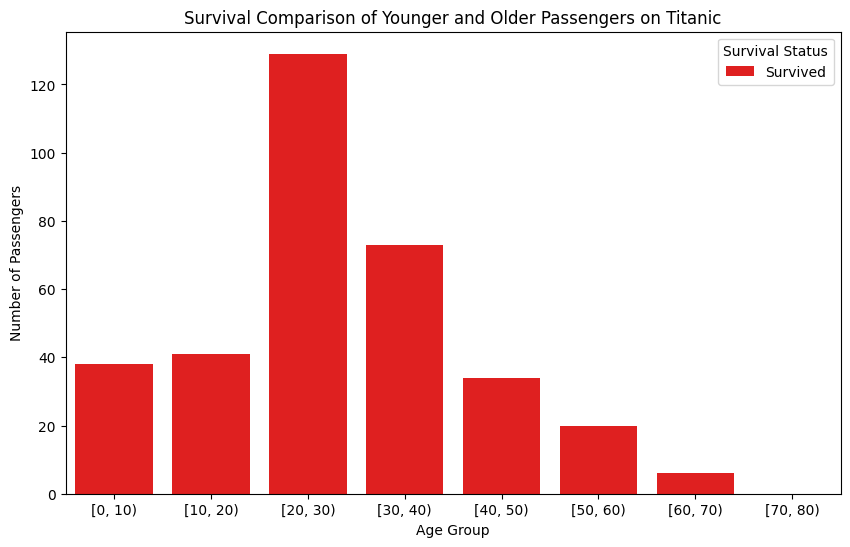

In [253]:
# Filter data for passengers aged 0-80
df_filtered = df_survived[df_survived['Age'].between(0, 80)]

# Create age groups with a width of 10
df_filtered['Age Group'] = pd.cut(df_filtered['Age'], bins=range(0, 81, 10), right=False)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', hue='Survived', data=df_filtered, palette=['red', 'green'])
plt.title('Survival Comparison of Younger and Older Passengers on Titanic')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.legend(title='Survival Status', labels=['Survived'])
plt.show()

For the graph alone I'm using the that younger people tend to survive more than those who are much older

Reference

-   QUCLA (2021). What is the difference between categorical, ordinal and interval variables? [online] stats.oarc.ucla.edu. Available at: https://stats.oarc.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-interval-variables/.

-   kaggle.com. (n.d.). Titanic - Machine Learning from Disaster. [online] Available at: https://www.kaggle.com/competitions/titanic/data.




‌